In [1]:
import os
import cv2
import numpy as np

def get_path(mag):
    path = r"C:\Users\IsabellaGagner\559144-9060\Melina Katkic - NORDAXON\CODE\Astra-Zeneca-Hackathon\images_for_preview\\"+mag+" images"
    input_path = path + "\\input"
    target_path = path + "\\targets"

    input_imgs_paths = [os.path.join(input_path, img_path) for img_path in os.listdir(input_path)]
    target_imgs_paths = [os.path.join(target_path, img_path) for img_path in os.listdir(target_path)]
    return input_imgs_paths, target_imgs_paths

I_20x_paths, T_20x_paths  = get_path("20x")
I_40x_paths, T_40x_paths  = get_path("40x")
I_60x_paths, T_60x_paths  = get_path("60x")

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

def get_imgs(paths, norm = True):
    imgs = []
    for img_path in paths:   
        im = cv2.imread(img_path,-1)
        imarray = np.array(im)
        imgs.append(imarray)
    return imgs

target_imgs_20x = get_imgs(T_20x_paths)
target_imgs_40x = get_imgs(T_40x_paths)
target_imgs_60x = get_imgs(T_60x_paths)

input_imgs_20x = get_imgs(I_20x_paths)
input_imgs_40x = get_imgs(I_40x_paths)
input_imgs_60x = get_imgs(I_60x_paths)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


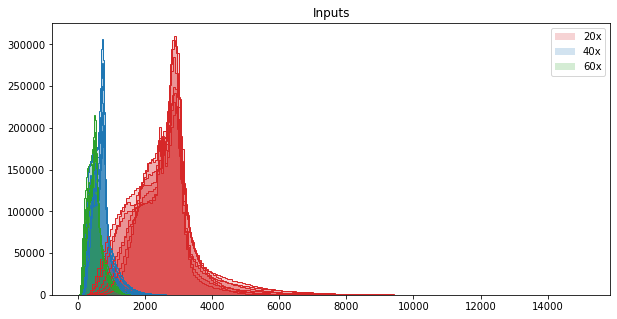

In [9]:
def plot_input_hists(imgs_):
    plt.figure(figsize=(10,5))
    colors = ['tab:red', 'tab:blue', 'tab:green']
    for input_nr in range(7):
        imgs = imgs_[input_nr]
        for i, img in enumerate(imgs):
            plt.hist(img.ravel(), 200, color = colors[i], histtype=u'step')
            if input_nr > 5:
                plt.hist(img.ravel(), 200, label = str((i+1)*2) + "0x", alpha = 0.2, color = colors[i])
            else:
                plt.hist(img.ravel(), 200, alpha = 0.2, color = colors[i])
        plt.legend();
        plt.title("Inputs")
    #plt.savefig("Inputs_bias.png")
        
targets = list(zip(target_imgs_20x, target_imgs_40x, target_imgs_60x))
inputs = list(zip(input_imgs_20x, input_imgs_40x, input_imgs_60x))
plot_input_hists(inputs)